In [1]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)

Loading required package: spatstat
Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.58-2       (nickname: ‘Not Even Wrong’) 
For an introduction to spatstat, type ‘beginner’ 

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [2]:
file = "../../../../../dataframes/enoe/SDEMT/df_09_transform.csv"


In [3]:
df <- read.csv(file = file)
data <- df
head(data)

Warning message in file(file, "rt"):
“cannot open file '../../../../../dataframes/enoe/SDEMT/df_09_transform.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
ncol(data)

In [ ]:
data_names <- c()
data_entropy <- c()

for (column in 1:ncol(data)) {
#    print(names(data[column]))
    entropy <- SpatEntropy::shannonX(data = matrix(data[column]))
  
  data_names <- append(x = data_names, values = names(data[column]))
  data_entropy <- append(x = data_entropy, values = entropy$shannon)
}

In [ ]:
df_entropy <- cbind(data.frame(data_names, data_entropy)) 
head(df_entropy)

In [ ]:
order_df_entropy <- df_entropy[order(df_entropy$data_entropy, decreasing = T), ]
head(order_df_entropy)

In [ ]:
ggplot(df_entropy, 
       aes(y=data_names, x=data_entropy)) + geom_point() + theme_light()

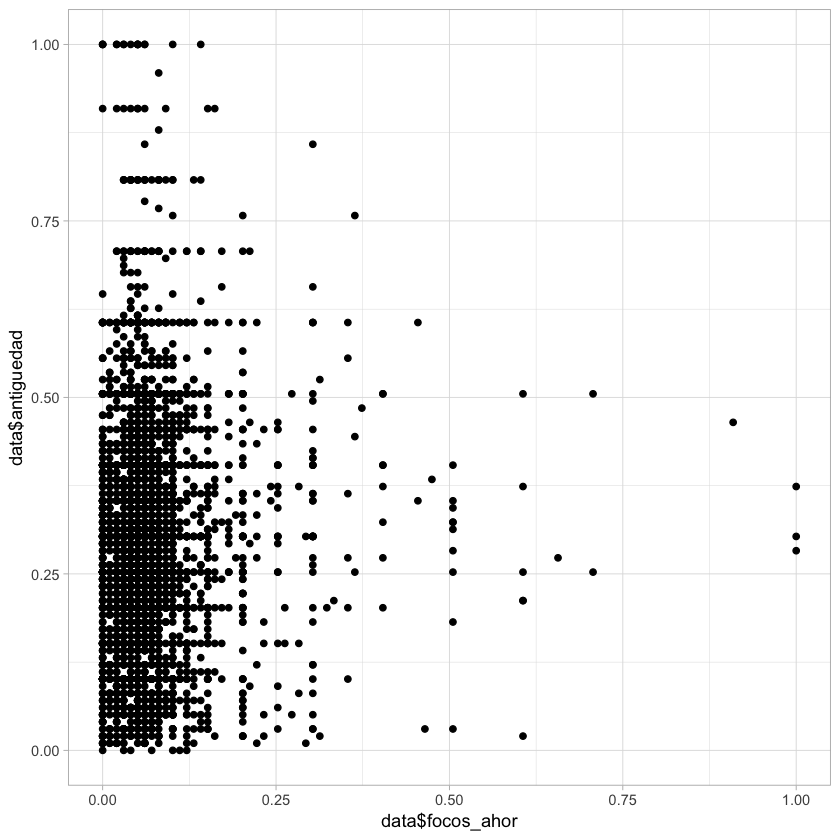

In [14]:
ggplot(data = data, 
       aes(y=data$antiguedad, 
           x=data$focos_ahor)) + geom_point() + theme_light()

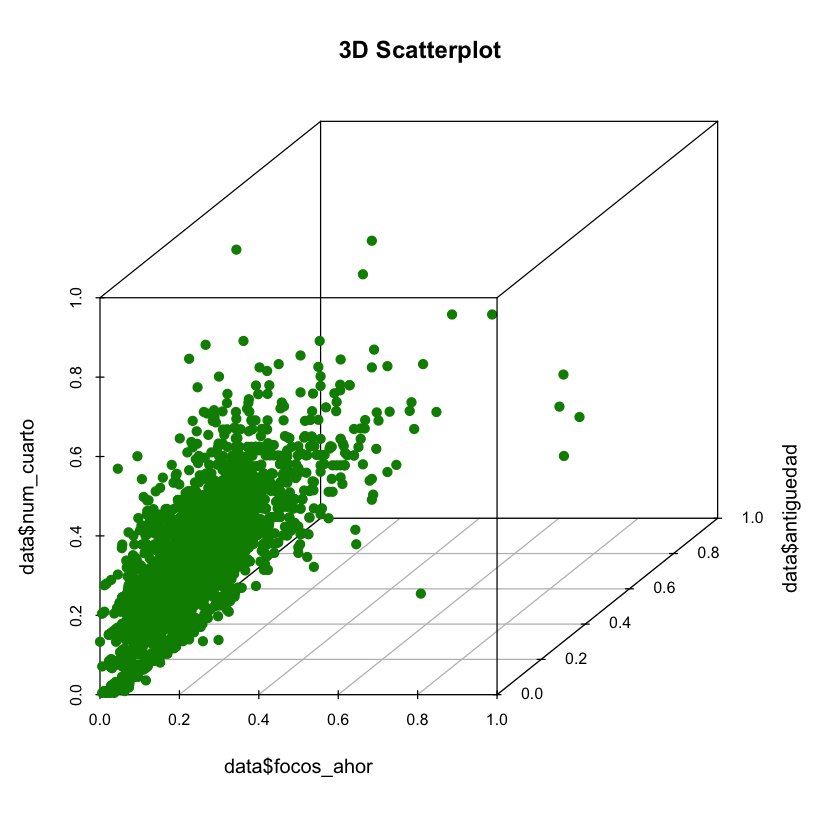

In [15]:
scatterplot3d(y=data$antiguedad, 
              x=data$focos_ahor,
              z=data$num_cuarto, pch = 19, color = "green4", main="3D Scatterplot")





In [16]:
file = "../../../../../../dataframes/enh/vivienda/df_09_entropy_transform_numerical.csv"


In [17]:
write.csv(order_df_entropy, 
          file = file,
          row.names=FALSE)
